In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def extract_bounds(value):
    if isinstance(value, str) and value.startswith('('):
        mean, upper, lower = eval(value)
        return mean, upper, lower
    else:
        return value, value, value  

def plot_with_variations(x, y_data, label, color=None, marker='o'):
    y_mean = [val[0] for val in y_data]
    y_upper = [val[1] for val in y_data]
    y_lower = [val[2] for val in y_data]
    plt.plot(x, y_mean, marker=marker, label=label, color=color)
    plt.fill_between(x, y_lower, y_upper, alpha=0.2, color=color)


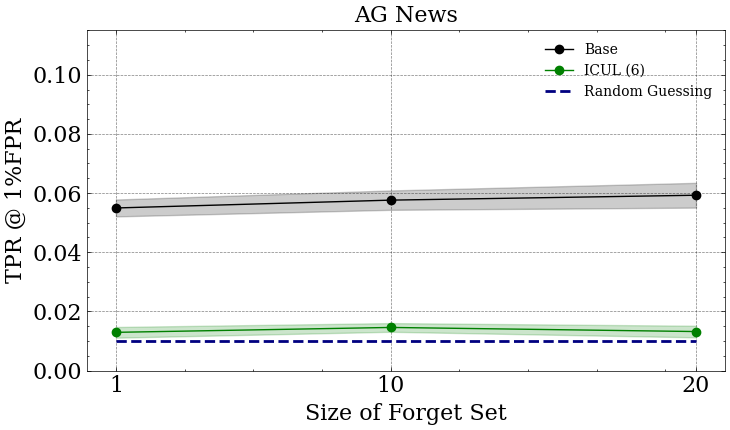

In [ ]:
list_ubs = [1, 10, 20]
datasets = ['amazon_polarity', 'sst2', 'ag_news']
titles = ['Amazon Polarity', 'SST-2', 'AG News']
k = 2
dataset_name = datasets[k]
title = titles[k]
file_path = f'results_tprs/{dataset_name}_{list_ubs}_tpr_at_fpr_001_lira_forget.csv'
tpr_at_fpr_001_df = pd.read_csv(file_path, index_col=0)

for col in tpr_at_fpr_001_df.columns:
    if col != 'random':
        tpr_at_fpr_001_df[col] = tpr_at_fpr_001_df[col].apply(extract_bounds)

# Best ICUL performance (minimum TPR across all ICUL variants)
icl_cols = [col for col in tpr_at_fpr_001_df.columns if col.startswith('icl_') and not col.endswith('best_perf') and not col.endswith('0')]
tpr_at_fpr_001_df['icl_best_perf'] = tpr_at_fpr_001_df.apply(
    lambda row: min([row[col] for col in icl_cols], key=lambda x: x[0]),  # Min by mean TPR (x[0])
    axis=1
)

# Random guessing
random_guessing_value = 0.01
tpr_at_fpr_001_df['random'] = random_guessing_value

plt.style.use('matplot.mplstyle')  
plt.figure(figsize=(7.5, 4.5))

# Plot each method with error bands
plot_with_variations(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['base'], 'Base', color='black')
# plot_with_variations(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['icl_0'], 'ICUL (0)', color='orange')
# plot_with_variations(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['icl_2'], 'ICUL (2)', color='blue')
# plot_with_variations(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['icl_4'], 'ICUL (4)', color='red')
# plot_with_variations(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['icl_6'], 'ICUL (6)', color='purple')
plot_with_variations(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['icl_best_perf'], 'ICUL (best)', color='green')

# Random guessing (no error bars)
plt.plot(tpr_at_fpr_001_df.index, tpr_at_fpr_001_df['random'], '--', linewidth=2, label='Random Guessing', color='navy')
# range of xaxis with only integer values
plt.xticks(ticks=tpr_at_fpr_001_df.index, labels=tpr_at_fpr_001_df.index)

plt.xlabel('Size of Forget Set')
plt.ylim(0, 0.115)
plt.ylabel('TPR @ 1%FPR')
plt.title(title)
plt.legend()
plt.grid(True)
plt.tight_layout()

savingtype = 'png'
plt.savefig(f'results_tprs/{dataset_name}_tpr_at_fpr_001.{savingtype}')
plt.show()